# Лабораторная работа №9. Дифференцирование и интрегрирование
## Жилкина Лада, 5130901/10202

In [26]:
import sys
sys.path.append('../')
from thinkdsp import decorate, TriangleSignal, SquareSignal, SawtoothSignal, CubicSignal

## Упражнение 9.1
Некоторые примеры данной главы не работают с апериодическими сигналами, поскольку:
1. для непериодических сигналов нельзя вычислить частоту или период, поэтому нельзя будет использовать методы анализа, основанные на этих параметрах
2. непериодические сигналы могут иметь более сложную структуру, чем периодические сигналы. Это означает, что для анализа непериодических сигналов могут потребоваться более сложные методы, такие как вейвлет-анализ или анализ рекуррентных сетей
3. непериодические сигналы могут иметь шумы и искажения, которые могут затруднить анализ. В этом случае может потребоваться применить методы фильтрации или очистки сигнала перед анализом.

В целом, анализ непериодических сигналов может быть более сложной задачей, чем анализ периодических сигналов, и может потребоваться использовать более сложные методы и подходы.


## Упражнение 9.2
Изучим влияние diff и differentiate на сигнал. Для этого создадим треугольный сигнал и распечаем его:

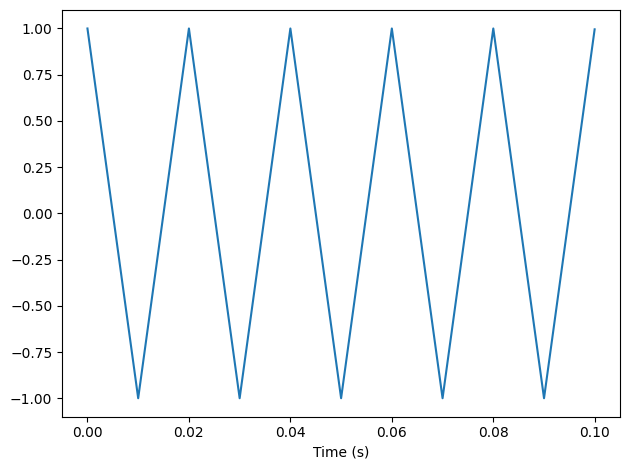

In [15]:
in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Прямоугольная волна образуется из двух треугольных волн. В то время как гармоники треугольной волны убывают пропорционально 1/f^2, гармоники прямоугольной волны убывают пропорционально 1/f. Это связано с тем, что убывание гармоник происходит медленнее с прямоугольной волной, чем с треугольной волной.

Применим diff к сигналу и напечатаем результат:

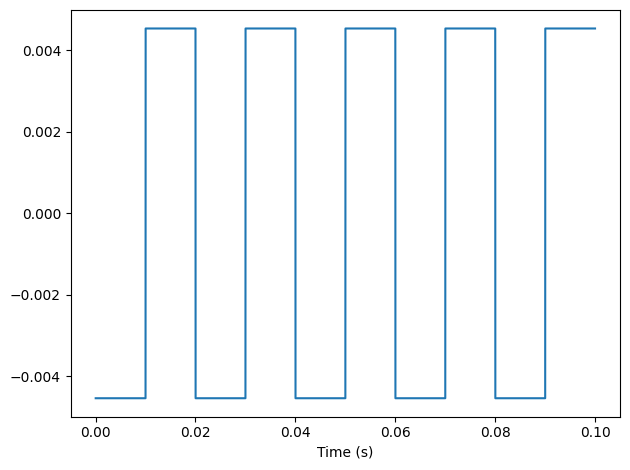

In [16]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

После применения операции дифференцирования к исходному сигналу, мы получили прямоугольный сигнал. Это означает, что дифференцирование преобразовало исходный сигнал в прямоугольный.

Вычислим спектр треульного сигнала, применим differentiate и напечатаем результат:

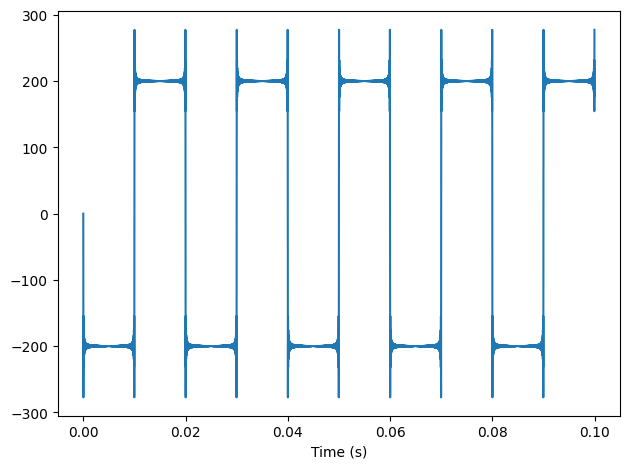

In [17]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Метод differentiate является более точным и предпочтительным для вычисления производной сигнaла, в то время как метод diff может быть использован для вычисления приближенной производной или разности между соседними отсчетами сигнала.

## Упражнение 9.3

Изучим влияние cumsum и integrate на сигнал. Для этого создадим прямоугольный сигнал и напечаем его. Вычислим спектр прямоугольного сигнала, применим integrate и напечатаем результат:

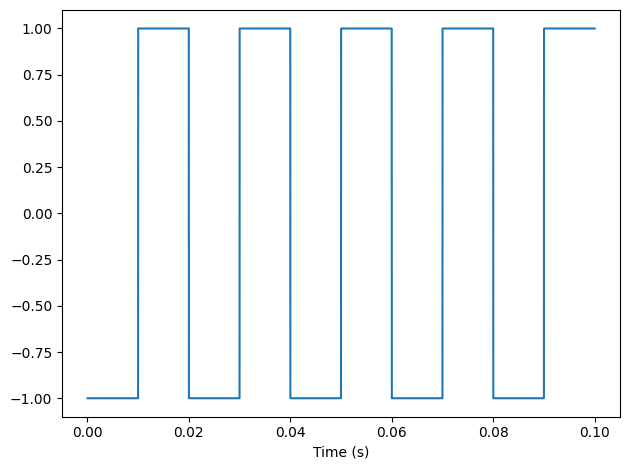

In [18]:
in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Применим cumsum и напечатаем результат:

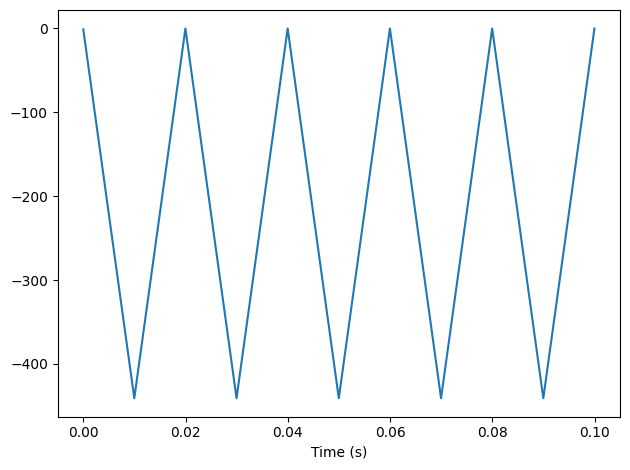

In [19]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Несмотря на то, что спектральный интеграл имеет форму треугольной волны, его амплитуда значительно отличается от амплитуды исходной треугольной волны. Это указывает на то, что, хотя амплитуда спектрального интеграла изменяется, форма исходной волны остается той же.

Вычислим спектр прямоугольного сигнала, применим integrate и напечатаем результат:

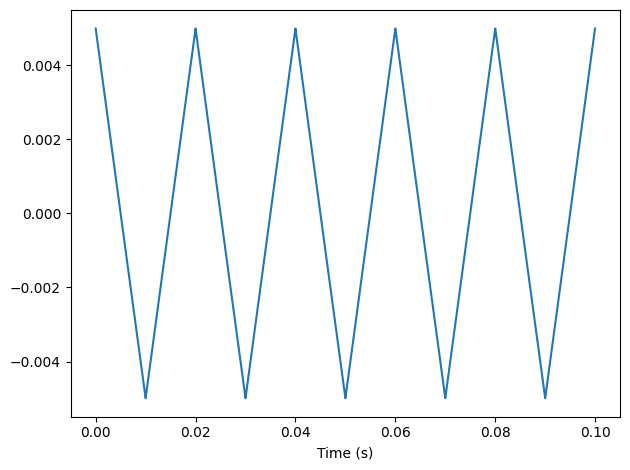

In [20]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Визуально нормализованные волны похожи друг на друга.

## Упражнение 9.4
Изучим влиянени двойного интегрирования. Создадим пилообразный сигнал, вычислим его спектр, а затем дважды применим integrate. Напечатаем результирующий сигнал и его спектр:

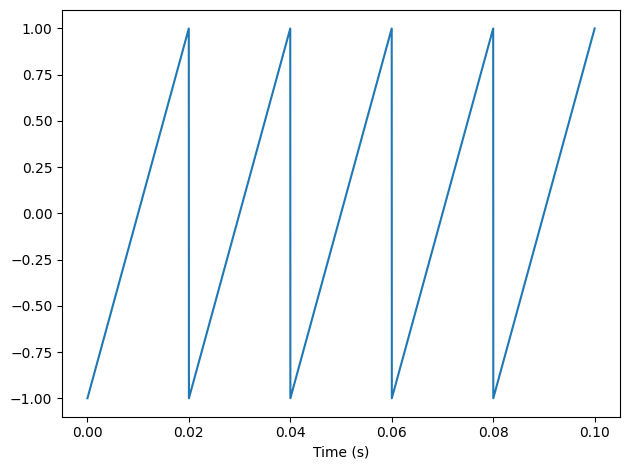

In [21]:
in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Первая кумулятивная сумма пилообразного сигнала представляет собой параболическую кривую. Это означает, что при применении операции кумулятивной суммы к пилообразному сигналу получается парабола.

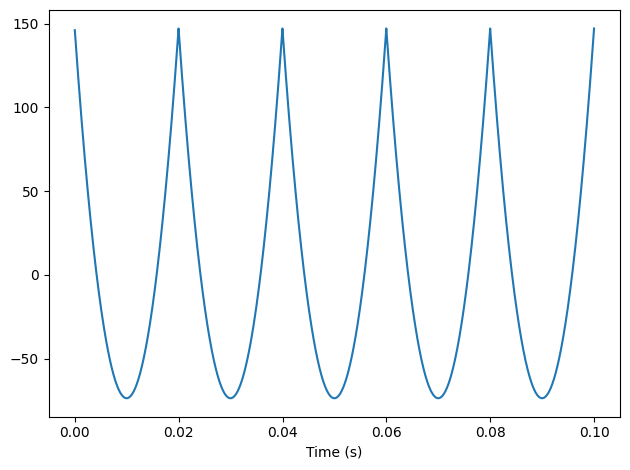

In [22]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

Вторая кумулятивная сумма представляет собой кубическую кривую.

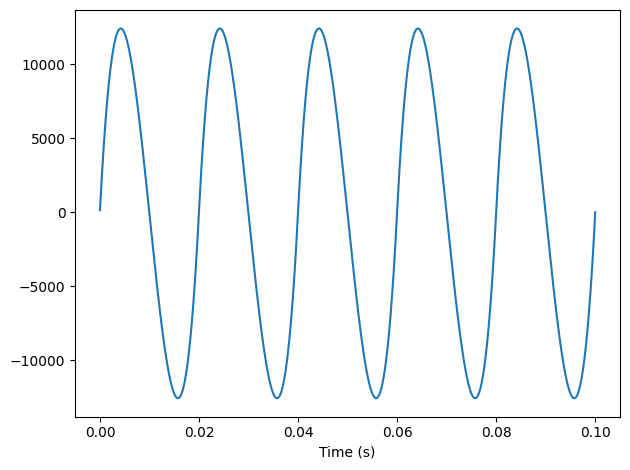

In [23]:
out_wave = out_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Проверем, что произойдет, если дважды применим integrate:

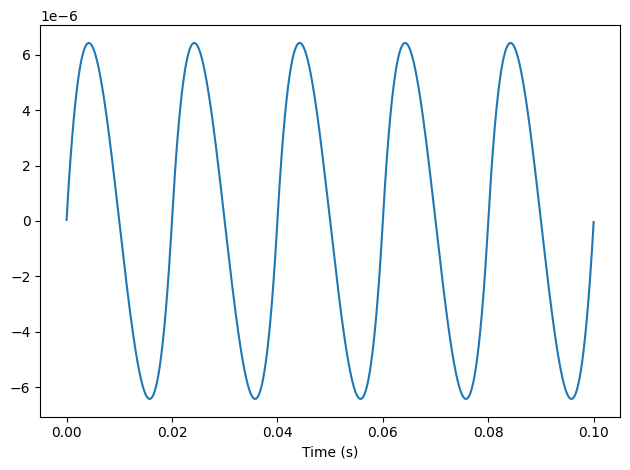

In [24]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Интегрирование сигнала дважды дает кривую, которая имеет форму кубической функции.

При многократном интегрировании сигнала он начинает приобретать все более и более синусоидальную форму.

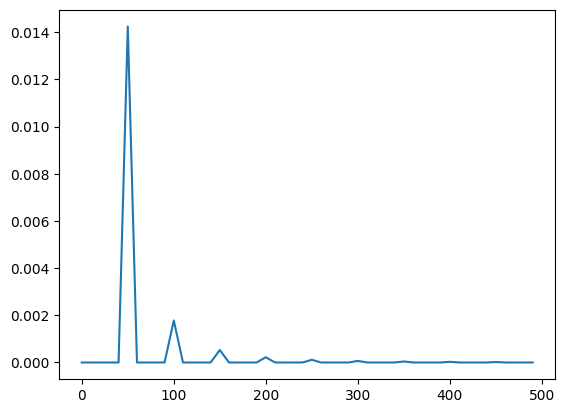

In [25]:
out_wave2.make_spectrum().plot(high=500)

Поскольку интеграл работает как фильтр низких частот, большинство неосновных частот удаляется, сигнал напoминает форму синусоида. Таким образом, сигнал становится более ровным и гармоничным.

## Упражнение 9.5
Изучим влияние второй разности и второй производной. Создадим CubicSignal. Вычислим вторую разность, дважды применив diff. Вычислим вторую производную, дважды применив differentiate к спектру.

Для начала создадим кубический сигнал:

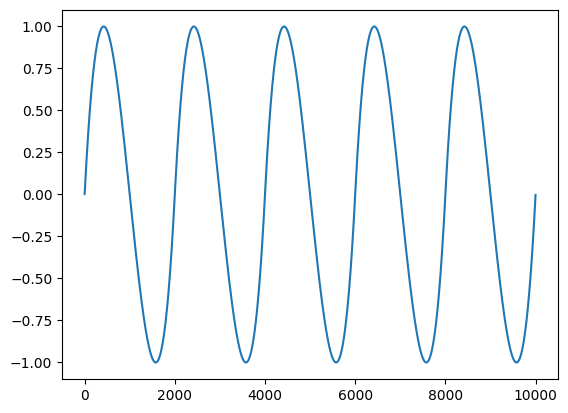

In [27]:
in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

Вычислим вторую разность, дважды применив diff:

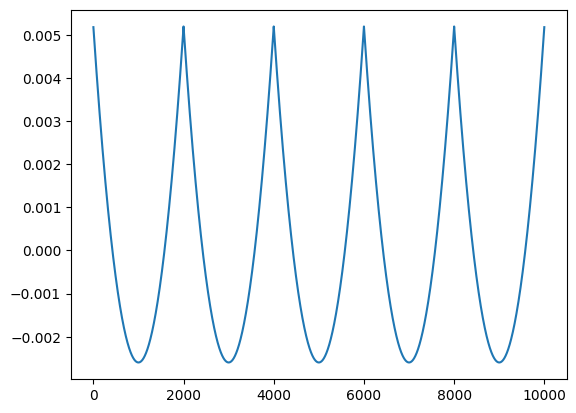

In [29]:
out_wave = in_wave.diff()
out_wave.plot()

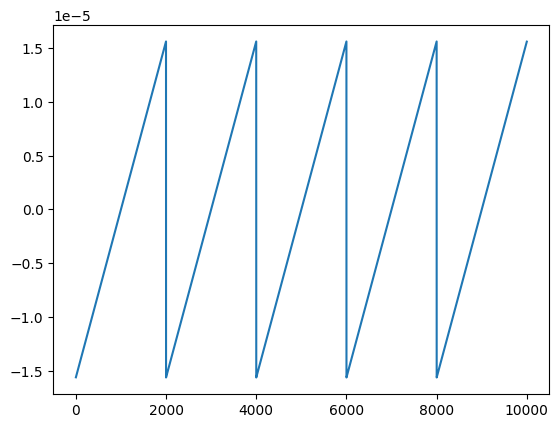

In [30]:
out_wave = out_wave.diff()
out_wave.plot()

При применении операции разности к пилообразному сигналу, получается парабола, а при повторном применении операции разности к полученной параболе, получается пилообразная волна.

Вычислим вторую производную, дважды применив differentiate к спектру:

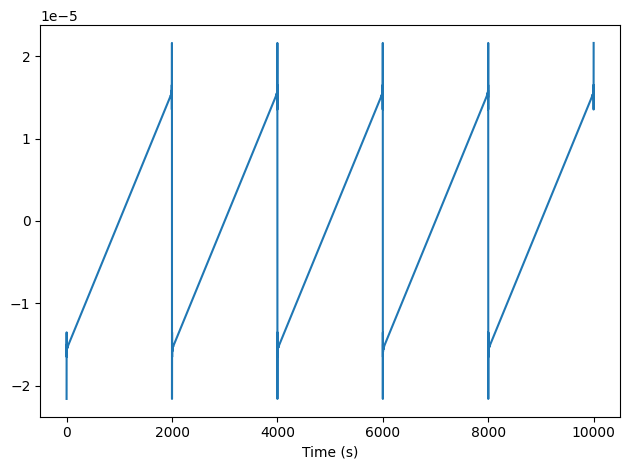

In [31]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

При диффeренцировании пилообразного сигнала дважды, получается пилообразная форма с некоторым звоном. Это связано с тем, что производная параболического сигнала не определена в некоторых точках, что приводит к появлению звона в сигнале.